In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
data=pd.read_csv("DATASET_Preprocessed_new_data.csv")
data

,Unnamed: 0,tweet,label
0,0,a a woman you should not complain about cleani...,2
1,1,boy dat cold tyga dwn bad for cuffin dat hoe i...,1
2,2,dawg you ever fuck a bitch and she sta to cry ...,1
3,3,she look like a tranny,1
4,4,the shit you hear about me might be true or it...,1
...,...,...,...
57432,57432,plan to whore out my sexy bitch tomorrow night...,2
57433,57433,bitch dude i did not even bother to read the w...,2
57434,57434,calling them is hea le therfore i will not cal...,2
57435,57435,silly killary wannabe and number just keep cli...,2


In [3]:
data

,Unnamed: 0,tweet,label
0,0,a a woman you should not complain about cleani...,2
1,1,boy dat cold tyga dwn bad for cuffin dat hoe i...,1
2,2,dawg you ever fuck a bitch and she sta to cry ...,1
3,3,she look like a tranny,1
4,4,the shit you hear about me might be true or it...,1
...,...,...,...
57432,57432,plan to whore out my sexy bitch tomorrow night...,2
57433,57433,bitch dude i did not even bother to read the w...,2
57434,57434,calling them is hea le therfore i will not cal...,2
57435,57435,silly killary wannabe and number just keep cli...,2


In [4]:
data.drop("Unnamed: 0",axis=1,inplace=True)
data

,tweet,label
0,a a woman you should not complain about cleani...,2
1,boy dat cold tyga dwn bad for cuffin dat hoe i...,1
2,dawg you ever fuck a bitch and she sta to cry ...,1
3,she look like a tranny,1
4,the shit you hear about me might be true or it...,1
...,...,...
57432,plan to whore out my sexy bitch tomorrow night...,2
57433,bitch dude i did not even bother to read the w...,2
57434,calling them is hea le therfore i will not cal...,2
57435,silly killary wannabe and number just keep cli...,2


In [5]:
data.dropna(inplace=True)
data.shape

(57367, 2)

In [6]:
data.label.value_counts()

1    26531
2    20562
0     8160
3     2114
Name: label, dtype: int64

In [7]:
import tensorflow as tf
import tensorflow_hub as hub

In [8]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(text):
    return model(text)

2021-10-18 11:57:34.092176: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-18 11:57:34.093608: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [9]:
y=data['label']
x=data['tweet']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y)


print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)


(43025,) (43025,)
(14342,) (14342,)


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import MultinomialNB


In [12]:
X_train_tweet = embed(list(X_train))

X_test_tweet = embed(list(X_test))

print("After Embedding vectorizations")
print(X_train_tweet.shape, y_train.shape)

print(X_test_tweet.shape, y_test.shape)
print("="*100)

After Embedding vectorizations
(43025, 512) (43025,)
(14342, 512) (14342,)


In [13]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import joblib
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score

In [14]:
def train_test_model(model, X_train, X_test, y_train, y_test,labels):
    print('Start training...', end='')
    model.fit(X_train, y_train)
    print('done!')
    print("="*80)
    print('Start testing...', end='')
    predictions = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    metrics_report = classification_report(y_test, predictions, target_names=labels)
    precision, recall, fscore, train_support = score(y_test, predictions, average='weighted')
    print('done!')
    print("="*80)
    return predictions, accuracy, metrics_report, (precision, recall, fscore)

In [15]:
labels_=['hatefull','offensive','neither','Tobacco']

Start training...done!
Start testing...done!
accuracy: 0.7083391437735322
              precision    recall  f1-score   support

    hatefull       0.58      0.29      0.39      2040
   offensive       0.73      0.82      0.77      6633
     neither       0.68      0.72      0.70      5141
     Tobacco       0.95      0.89      0.92       528

    accuracy                           0.71     14342
   macro avg       0.74      0.68      0.69     14342
weighted avg       0.70      0.71      0.70     14342



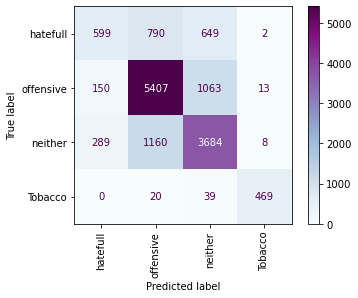

In [16]:
log_model=LogisticRegression(penalty='l2',max_iter=1000)
predictions, accuracy, metrics_report, log_prf = train_test_model(log_model, X_train_tweet, X_test_tweet, y_train, y_test, labels_)


print('accuracy: {}'.format(accuracy))
print('='*100)
print(metrics_report)

plot_confusion_matrix(log_model, X_test_tweet, y_test, display_labels=labels_, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
accuracy: 0.6985078789569098
              precision    recall  f1-score   support

    hatefull       0.47      0.45      0.46      2040
   offensive       0.76      0.75      0.76      6633
     neither       0.69      0.70      0.69      5141
     Tobacco       0.85      0.95      0.90       528

    accuracy                           0.70     14342
   macro avg       0.69      0.71      0.70     14342
weighted avg       0.70      0.70      0.70     14342



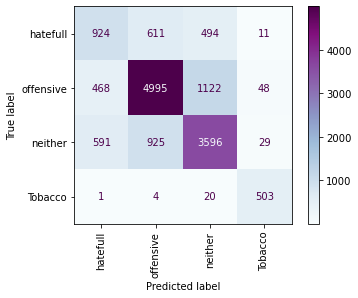

In [17]:
svm = LinearSVC(class_weight='balanced', verbose=False, max_iter=10000, tol=1e-4, C=0.1)

predictions, accuracy, metrics_report, svm_prf = train_test_model(svm, X_train_tweet, X_test_tweet, y_train, y_test, labels_)


print('accuracy: {}'.format(accuracy))
print('='*100)
print(metrics_report)

plot_confusion_matrix(svm, X_test_tweet, y_test, display_labels=labels_, xticks_rotation='vertical', cmap="BuPu")

In [18]:
weights={0:0.259068,1:0.079680,2:0.102811,3:1}

MODELS WITH CLASS WEIGHTS

Start training...done!
Start testing...done!
accuracy: 0.6736159531446102
              precision    recall  f1-score   support

    hatefull       0.39      0.59      0.47      2040
   offensive       0.80      0.68      0.73      6633
     neither       0.69      0.67      0.68      5141
     Tobacco       0.81      0.96      0.88       528

    accuracy                           0.67     14342
   macro avg       0.67      0.72      0.69     14342
weighted avg       0.70      0.67      0.68     14342



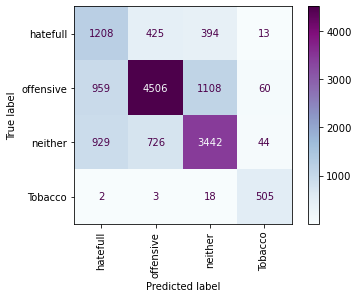

In [19]:
log_model=LogisticRegression(penalty='l2',max_iter=1000,class_weight=weights)
predictions, accuracy, metrics_report, log_prf = train_test_model(log_model, X_train_tweet, X_test_tweet, y_train, y_test, labels_)


print('accuracy: {}'.format(accuracy))
print('='*100)
print(metrics_report)

plot_confusion_matrix(log_model, X_test_tweet, y_test, display_labels=labels_, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
accuracy: 0.6902802956351973
              precision    recall  f1-score   support

    hatefull       0.46      0.46      0.46      2040
   offensive       0.76      0.74      0.75      6633
     neither       0.69      0.69      0.69      5141
     Tobacco       0.73      0.96      0.83       528

    accuracy                           0.69     14342
   macro avg       0.66      0.71      0.68     14342
weighted avg       0.69      0.69      0.69     14342



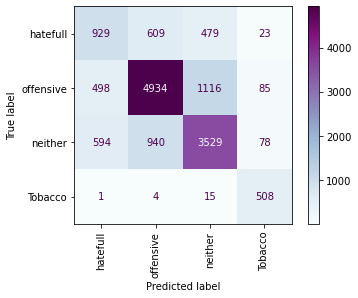

In [20]:
svm = LinearSVC(class_weight=weights, verbose=False, max_iter=10000, tol=1e-4, C=0.1)

predictions, accuracy, metrics_report, svm_prf = train_test_model(svm, X_train_tweet, X_test_tweet, y_train, y_test, labels_)


print('accuracy: {}'.format(accuracy))
print('='*100)
print(metrics_report)

plot_confusion_matrix(svm, X_test_tweet, y_test, display_labels=labels_, xticks_rotation='vertical', cmap="BuPu")

In [21]:
from keras.layers import Input, Lambda, Dense,GRU,LSTM,Flatten
from keras.models import Model
import keras.backend as K

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50456 entries, 0 to 50505
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   50456 non-null  object
 1   label   50456 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


In [23]:
x=data['tweet']
y=data['label']

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify=y, random_state=42)
x_train, x_cv, y_train, y_cv = train_test_split(x_train, 
                                                y_train, 
                                                test_size=0.20, 
                                                stratify=y_train, 
                                                random_state=42)

In [25]:
print(x_train.shape,y_train.shape)
print(x_cv.shape,y_cv.shape)
print(x_test.shape,y_test.shape)

(32291,) (32291,)
(8073,) (8073,)
(10092,) (10092,)


MODELS WITH NEURAL NETWORKS

In [26]:
model = tf.keras.models.Sequential()

In [27]:
x = tf.keras.layers.Input(shape=[], dtype=tf.string)
y_ = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4', 
                    trainable=True)(x)
k = tf.keras.layers.Dense(256,activation='relu')(y_)
p = tf.keras.layers.Dropout(rate=0.25)(k)
z = tf.keras.layers.Dense(4, activation='softmax')(p)
model = tf.keras.models.Model(x, z)

In [28]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [29]:
%%time
model.fit(x_train, 
          y_train, 
          epochs=5, 
          validation_data=(x_cv, y_cv))

Epoch 1/5
1010/1010 [==============================] - 245s 236ms/step - loss: 0.5822 - accuracy: 0.7617 - val_loss: 0.5064 - val_accuracy: 0.7904
Epoch 2/5
1010/1010 [==============================] - 237s 235ms/step - loss: 0.2189 - accuracy: 0.9203 - val_loss: 0.6157 - val_accuracy: 0.7779
Epoch 3/5
1010/1010 [==============================] - 238s 236ms/step - loss: 0.0521 - accuracy: 0.9825 - val_loss: 0.8823 - val_accuracy: 0.7617
Epoch 4/5
1010/1010 [==============================] - 237s 235ms/step - loss: 0.0242 - accuracy: 0.9919 - val_loss: 1.1100 - val_accuracy: 0.7531
Epoch 5/5
1010/1010 [==============================] - 237s 234ms/step - loss: 0.0168 - accuracy: 0.9946 - val_loss: 1.0282 - val_accuracy: 0.7671
CPU times: user 15min 14s, sys: 37.5 s, total: 15min 51s
Wall time: 20min 28s


In [30]:
predicts=model.predict(x_test)

In [31]:
y_predict=[np.argmax(x) for x in predicts ]
len(y_predict)

10092

In [32]:
y_test

38733    2
47872    0
39102    2
37112    1
39684    2
        ..
41958    2
47209    0
17340    1
22110    1
29055    0
Name: label, Length: 10092, dtype: int64

In [33]:
from sklearn import metrics

In [34]:
print(metrics.confusion_matrix(y_test,y_predict))

[[ 951  507  169    5]
 [ 346 4495  459    7]
 [ 122  706 1896    6]
 [   6    8   13  396]]


In [35]:
from sklearn.metrics import classification_report

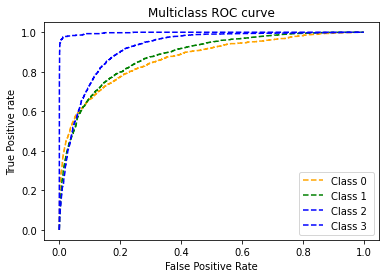

In [36]:
from sklearn.metrics import roc_auc_score

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test, predicts[:,i],pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 ')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 ')
plt.plot(fpr[3], tpr[3], linestyle='--',color='blue', label='Class 3 ')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);   

In [37]:
metrics_report = classification_report(y_test, y_predict, target_names=labels_)
print(metrics_report)

              precision    recall  f1-score   support

    hatefull       0.67      0.58      0.62      1632
   offensive       0.79      0.85      0.82      5307
     neither       0.75      0.69      0.72      2730
     Tobacco       0.96      0.94      0.95       423

    accuracy                           0.77     10092
   macro avg       0.79      0.77      0.78     10092
weighted avg       0.76      0.77      0.76     10092



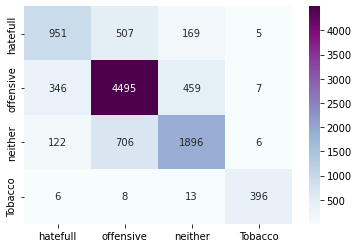

In [38]:
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test,y_predict)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='BuPu',xticklabels=labels_,yticklabels=labels_)

In [39]:
x1 = tf.keras.layers.Input(shape=[], dtype=tf.string)
y_1 = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4', 
                    trainable=True)(x1)
k1 = tf.keras.layers.Dense(128,activation='relu')(y_1)
p1 = tf.keras.layers.Dropout(rate=0.50)(k1)
z1 = tf.keras.layers.Dense(4, activation='softmax')(p1)
model1 = tf.keras.models.Model(x1, z1)

In [40]:
model1.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [41]:
%%time
model1.fit(x_train, 
          y_train, 
          epochs=3, 
          validation_data=(x_cv, y_cv))

Epoch 1/3
1010/1010 [==============================] - 244s 235ms/step - loss: 0.6035 - accuracy: 0.7594 - val_loss: 0.5083 - val_accuracy: 0.7976
Epoch 2/3
1010/1010 [==============================] - 237s 235ms/step - loss: 0.2339 - accuracy: 0.9181 - val_loss: 0.6099 - val_accuracy: 0.7739
Epoch 3/3
1010/1010 [==============================] - 238s 235ms/step - loss: 0.0605 - accuracy: 0.9814 - val_loss: 0.9152 - val_accuracy: 0.7784
CPU times: user 9min 12s, sys: 22.1 s, total: 9min 35s
Wall time: 11min 58s


In [42]:
predicts1=model1.predict(x_test)

In [43]:
predicts1[0]

array([1.4717305e-04, 1.7301677e-02, 9.8254055e-01, 1.0566579e-05],
      dtype=float32)

In [44]:
y_predict1=[np.argmax(x) for x in predicts1 ]
len(y_predict1)

10092

In [45]:
metrics_report1 = classification_report(y_test, y_predict1, target_names=labels_)
print(metrics_report1)

              precision    recall  f1-score   support

    hatefull       0.68      0.57      0.62      1632
   offensive       0.83      0.81      0.82      5307
     neither       0.71      0.82      0.76      2730
     Tobacco       0.98      0.91      0.94       423

    accuracy                           0.78     10092
   macro avg       0.80      0.78      0.79     10092
weighted avg       0.78      0.78      0.78     10092



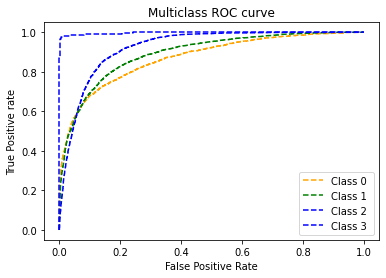

In [46]:
from sklearn.metrics import roc_auc_score

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test, predicts1[:,i],pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 ')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 ')
plt.plot(fpr[3], tpr[3], linestyle='--',color='blue', label='Class 3 ')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);   

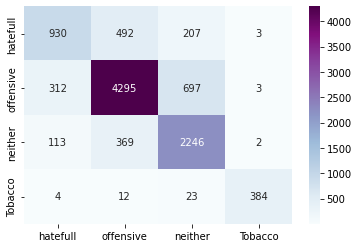

In [47]:
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test,y_predict1)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='BuPu',xticklabels=labels_,yticklabels=labels_)